<a href="https://colab.research.google.com/github/lunarlores/omics-python/blob/main/Assignment_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np


## Processing Data: Sheet S1A

👉 You need to upload the filepath in Files 📁. (don't upload inside sample_data)
⭐You can also set the sheet name based on the excel file.

In [2]:
# --- Input Sheet ---
excel_file_path = '/content/CELL-179-suppl1-t.test.xlsx'
sheet_name = 'S1A'


🍀This step makes sure the dataframe we make has the appropiate header. If it began from row 1 in excel, we would not have the appropiate headers.

In [3]:
# --- dataframe loading variables
start_row = 1  # e.g., skip first 1 row, so data starts from row 2

🍀This function loads excel sheet and turns it to a dataframe.

In [4]:
# --- Function Definition ---
def load_excel_sheet_to_dataframe(file_path, sheet, start_row):
    df = pd.read_excel(file_path, sheet_name=sheet, skiprows=start_row)
    return df


⭐This runs the function, you can call this function back again in this sheet when opening another excel file.

In [5]:
# --- Run Function ---
df = load_excel_sheet_to_dataframe(excel_file_path, sheet_name, start_row)


⭐This will display the dataframe nicely. It has to be the last command in every chunk.

In [6]:
df

,Sample ID,Cohort,gender,Age at treatment,BRAF mutation,LDH above normal?,Response,PFS time (months),OS time (months),prior targeted therapy,Prior Ipilimumab,Nb of CD8 cells in infusion bag (x10^10),Sample taken after treatment
0,TIL_6,TIL,F,49.000000,N,N,CR,72.53,72.53,N,Y,8.526,NaN
1,TIL_16,TIL,M,66.000000,N,N,CR,100.77,100.77,N,N,2.812,NaN
2,TIL_1,TIL,M,61.000000,Y,N,CR,104.20,104.20,N,N,6.052,NaN
3,TIL_44,TIL,M,59.000000,Y,N,CR,54.10,54.10,Y,N,0.636,NaN
4,TIL_35,TIL,F,53.000000,N,N,PD,0.97,5.07,N,N,1.900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,PD1 85,a-PD1,F,83.835616,N,N,SD,8.83,8.83,N,Y,NaN,NaN
112,PD1 66,a-PD1,M,73.980822,N,N,SD,5.47,4.60,N,Y,NaN,NaN
113,PD1_17,a-PD1,F,66.917808,N,NaN,SD,30.73,30.73,N,Y,NaN,NaN
114,PD1 55,a-PD1,M,59.304110,N,NaN,SD,11.63,15.87,N,N,NaN,NaN


🍀This is just to show that this file has a NaN value in every row. So it can't just be removed at the start. This is how it was also done in the OG R assignment.

In [7]:
# --- Remove Rows with Any NaNs ---
df_no_nan = df.dropna()

🍀 More elaboration on the previous part. Notice the Missing Value issue. Where do you see the biggest share of missing values (which column)? Is it needed?

In [8]:
# --- Summary Comparison ---
print("Original DataFrame shape:", df.shape)
print("DataFrame without NaNs shape:", df_no_nan.shape)
print("Number of rows with at least one NaN:", df.shape[0] - df_no_nan.shape[0])
print("\nMissing values per column in original DataFrame:")
print(df.isna().sum())


Original DataFrame shape: (116, 13)
DataFrame without NaNs shape: (0, 13)
Number of rows with at least one NaN: 116

Missing values per column in original DataFrame:
Sample ID                                     0
Cohort                                        0
gender                                        0
Age at treatment                              0
BRAF mutation                                15
LDH above normal?                            11
Response                                      0
PFS time (months)                             0
OS time (months)                              0
prior targeted therapy                        0
Prior Ipilimumab                              0
Nb of CD8 cells in infusion bag (x10^10)     74
Sample taken after treatment                114
dtype: int64


⭐How to remove a column

In [9]:
# --- Drop Column Named 'Sample taken after treatment' ---
df = df.drop(columns=['Sample taken after treatment'])


🍀Do you understand why we removed "Sample taken after treatment"?
Not only irrelevant, but if we dropped NaN as is, we would lose all the values.
    DataFrame without NaNs shape: (0, 13)



In [10]:
# --- Summary Comparison ---
print("\nMissing values per column in original DataFrame:")
print(df.isna().sum())
print(df.shape)



Missing values per column in original DataFrame:
Sample ID                                    0
Cohort                                       0
gender                                       0
Age at treatment                             0
BRAF mutation                               15
LDH above normal?                           11
Response                                     0
PFS time (months)                            0
OS time (months)                             0
prior targeted therapy                       0
Prior Ipilimumab                             0
Nb of CD8 cells in infusion bag (x10^10)    74
dtype: int64
(116, 12)


⭐Compare the shape of df now with our previous actions. It has less data entries removed. Eventually, when the t-test happens, it will drop NaNs for it to work, as you can see in the OG sheet.

    {r perform t-tests}
    ...
    medians <- tapply(gene_table$Expression, gene_table$Response, median, na.rm=TRUE)
    ...

In [11]:
# --- Remove Rows with Any NaNs ---
df_no_nan = df.dropna()
# --- Summary Comparison ---
print("Original DataFrame shape:", df.shape)
print("DataFrame without NaNs shape:", df_no_nan.shape)
print("Number of rows with at least one NaN:", df.shape[0] - df_no_nan.shape[0])
print("\nMissing values per column in original DataFrame:")
print(df.isna().sum())

Original DataFrame shape: (116, 12)
DataFrame without NaNs shape: (38, 12)
Number of rows with at least one NaN: 78

Missing values per column in original DataFrame:
Sample ID                                    0
Cohort                                       0
gender                                       0
Age at treatment                             0
BRAF mutation                               15
LDH above normal?                           11
Response                                     0
PFS time (months)                            0
OS time (months)                             0
prior targeted therapy                       0
Prior Ipilimumab                             0
Nb of CD8 cells in infusion bag (x10^10)    74
dtype: int64


⭐ So it is important to make sure not too much data is lost. According to the main assignment, we will now remove more of the unimportant columns. The assignment also renames to Sample and Age, for ease.

In [12]:
# --- Drop Specified Column ---
df = df.drop(columns=["Nb of CD8 cells in infusion bag (x10^10)"])
#according to assignment

In [13]:
# --- Rename Columns ---
df = df.rename(columns={
    "Sample ID": "Sample",
    "Age at treatment": "Age"
})


👉Why do you think this was removed? Do we need it for our analysis? What if we did (e.g. we were checking response to TIL therapy instead)?

Since we don't now, we will remove it. (Sheet S1D after all only has anti-PD1 data). But now I leave the question to you:
Should we remove the BRAF mutation and LDH above normal column? For the sake of consistency with the main article we wont.
Meaning...This will result in about 15 lost entries when we do our T-test.

In [14]:
#Put your thoughts in comments here :P
#

In [15]:
# --- Remove Rows with Any NaNs ---
df_no_nan = df.dropna()
# --- Summary Comparison ---
print("Original DataFrame shape:", df.shape)
print("DataFrame without NaNs shape:", df_no_nan.shape)
print("Number of rows with at least one NaN:", df.shape[0] - df_no_nan.shape[0])
print("\nMissing values per column in original DataFrame:")
print(df.isna().sum())

Original DataFrame shape: (116, 11)
DataFrame without NaNs shape: (94, 11)
Number of rows with at least one NaN: 22

Missing values per column in original DataFrame:
Sample                     0
Cohort                     0
gender                     0
Age                        0
BRAF mutation             15
LDH above normal?         11
Response                   0
PFS time (months)          0
OS time (months)           0
prior targeted therapy     0
Prior Ipilimumab           0
dtype: int64


🍀 Get an idea of the first sheet we are dealing with.

In [16]:
# --- Detailed Summary Based on Data Type ---
for column in df.columns:
    print(f"--- Summary of '{column}' ---")
    dtype = df[column].dtype
    print("Data type:", dtype)

    if pd.api.types.is_numeric_dtype(dtype):
        print("Numeric variable")
    elif pd.api.types.is_string_dtype(dtype) or pd.api.types.is_categorical_dtype(dtype):
        print("Discrete variable")
        print("Unique values:", df[column].unique())
    else:
        print("Other type")

    print()


--- Summary of 'Sample' ---
Data type: object
Discrete variable
Unique values: ['TIL_6' 'TIL_16' 'TIL_1' 'TIL_44' 'TIL_35' 'TIL_2' 'TIL_42' 'TIL_12'
 'TIL_13' 'TIL_27' 'TIL_4' 'TIL_20' 'TIL_21' 'TIL_29' 'TIL_43' 'TIL_15'
 'TIL_30' 'TIL_31' 'TIL_14' 'TIL_19' 'TIL_26' 'TIL_36' 'TIL_37' 'TIL_8'
 'TIL_9' 'TIL_5' 'TIL_41' 'TIL_22' 'TIL_23' 'TIL_3' 'TIL_40' 'TIL_7'
 'TIL_10' 'TIL_34' 'TIL_38' 'TIL_39' 'TIL_18' 'TIL_11' 'TIL_17' 'TIL_28'
 'TIL_32' 'TIL_24' 'PD1_14' 'PD1_15' 'PD1_6' 'PD1 62' 'PD1_10' 'PD1_47'
 'PD1 75' 'PD1_21' 'PD1_49' 'PD1 56' 'PD1_16' 'PD1_29' 'PD1 72' 'PD1 65'
 'PD1_33' 'PD1_41' 'PD1_44' 'PD1 61' 'PD1 63' 'PD1 70' 'PD1 64' 'PD1_32'
 'PD1_39' 'PD1_45' 'PD1_50' 'PD1 57' 'PD1 76' 'PD1 74' 'PD1 77' 'PD1_30'
 'PD1_36' 'PD1 60' 'PD1_38' 'PD1_43' 'PD1 78' 'PD1 81' 'PD1_11' 'PD1_13'
 'PD1_18' 'PD1_23' 'PD1_25' 'PD1_26' 'PD1_9' 'PD1_24' 'PD1_7' 'PD1 59'
 'PD1 73' 'PD1 84' 'PD1_20' 'PD1_8' 'PD1_19' 'PD1_4' 'PD1_46' 'PD1 79'
 'PD1 83' 'PD1 67' 'PD1_1' 'PD1 68' 'PD1 82' 'PD1_27' 'PD1_

⭐The assignment also fixes the inconsistency in the Sample column. Some do not have the required underscore.

In [17]:
# --- Count Occurrences of "_" and " " in 'Sample' Column ---
underscore_count = df['Sample'].str.contains('_', na=False).sum()
space_count = df['Sample'].str.contains(' ', na=False).sum()

print(f"Samples with '_': {underscore_count}")
print(f"Samples with space: {space_count}")


Samples with '_': 85
Samples with space: 31


In [18]:
# --- Replace Spaces with Underscores in 'Sample' Column ---
df['Sample'] = df['Sample'].str.replace(' ', '_', regex=False)


In [19]:
# --- Count Occurrences of "_" and " " in 'Sample' Column ---
underscore_count = df['Sample'].str.contains('_', na=False).sum()
space_count = df['Sample'].str.contains(' ', na=False).sum()

print(f"Samples with '_': {underscore_count}")
print(f"Samples with space: {space_count}")


Samples with '_': 116
Samples with space: 0


🍀Now I am renaming df to ExpSetup, just like the paper. for convenience I use df

In [20]:
# --- Rename DataFrame ---
ExpSetup = df
#Now I can run the same process again with df, without losing our progress.

In [21]:
ExpSetup

,Sample,Cohort,gender,Age,BRAF mutation,LDH above normal?,Response,PFS time (months),OS time (months),prior targeted therapy,Prior Ipilimumab
0,TIL_6,TIL,F,49.000000,N,N,CR,72.53,72.53,N,Y
1,TIL_16,TIL,M,66.000000,N,N,CR,100.77,100.77,N,N
2,TIL_1,TIL,M,61.000000,Y,N,CR,104.20,104.20,N,N
3,TIL_44,TIL,M,59.000000,Y,N,CR,54.10,54.10,Y,N
4,TIL_35,TIL,F,53.000000,N,N,PD,0.97,5.07,N,N
...,...,...,...,...,...,...,...,...,...,...,...
111,PD1_85,a-PD1,F,83.835616,N,N,SD,8.83,8.83,N,Y
112,PD1_66,a-PD1,M,73.980822,N,N,SD,5.47,4.60,N,Y
113,PD1_17,a-PD1,F,66.917808,N,NaN,SD,30.73,30.73,N,Y
114,PD1_55,a-PD1,M,59.304110,N,NaN,SD,11.63,15.87,N,N


## Processing Data: Sheet S1D

🍀Recap: Inputting sheet info, row info.

In [22]:
# --- Input Sheet ---
sheet_name = 'S1D'
# --- dataframe loading variables
start_row = 1  # e.g., skip first 1 row, so data starts from row 2

🍀We reuse the same function. Run below to see a popup. You can close the sidebar then.

In [23]:
??load_excel_sheet_to_dataframe

🍀Run and Display

In [24]:
# --- Run Function ---
df = load_excel_sheet_to_dataframe(excel_file_path, sheet_name, start_row)
df

,PD1_9,PD1_8,PD1_7,PD1_6,PD1_53,PD1_51,PD1_50,PD1_36,PD1_38,PD1_39,...,PD1_81,PD1_82,PD1_83,PD1_84,T: T: Gene name,T: ENSG,T: ENST,T: ENSP,T: Uniprot,T: Protein name
0,1.717230,0.612858,0.411135,1.415780,0.298291,-0.057493,0.959463,0.244044,0.503121,-0.238156,...,NaN,0.612526,1.556960,1.116150,SFN,ENSG00000175793,ENST00000339276,ENSP00000340989,P31947;Q6FH30;Q6FH51;Q96DH0,14-3-3 protein sigma
1,3.179710,2.407320,2.991440,3.532460,2.533590,3.313960,2.125910,3.267310,1.391240,3.021500,...,-0.05683,3.163480,4.553930,2.075480,HLA-A,ENSG00000223980;ENSG00000206505;ENSG0000023183...,ENST00000454091;ENST00000552493;ENST0000038360...,ENSP00000410645;ENSP00000448992;ENSP0000037310...,O19647;O43906;O46874;O77937;P10314;P30447;P304...,"HLA class I histocompatibility antigen, A-23 a..."
2,2.213800,4.662420,3.367630,3.080920,2.547060,1.116430,2.567000,1.845420,2.424430,3.199690,...,NaN,3.618450,3.902570,2.616380,HLA-B,ENSG00000206450;ENSG00000223532;ENSG0000023212...,ENST00000359635;ENST00000425848;ENST0000045087...,ENSP00000352656;ENSP00000400842;ENSP0000038820...,O02957;O19556;O19627;O19651;O19675;O19758;O628...,"HLA class I histocompatibility antigen, B-18 a..."
3,-1.534310,4.889010,3.939580,3.738570,2.277650,1.073910,1.660840,4.186930,2.184790,3.609160,...,2.79674,2.454300,2.611990,3.175110,HLA-DRB1,ENSG00000229074;ENSG00000236884;ENSG0000020624...,ENST00000437784;ENST00000444645;ENST0000061782...,ENSP00000405960;ENSP00000409322;ENSP0000048163...,B0UYW1;O46699;O46872;P13761;Q30149;Q9TQE0;A0MW...,"HLA class II histocompatibility antigen, DRB1-..."
4,1.765810,-0.147199,0.083898,1.537810,0.035599,1.810680,0.607316,0.951348,-0.006182,-0.839965,...,NaN,0.750030,-0.007263,-1.658850,NT5C2,ENSG00000076685,ENST00000343289;ENST00000404739;ENST0000042128...,ENSP00000339479;ENSP00000383960;ENSP0000039646...,B7Z382;D3DR91;H0YHR8;P49902;Q5JUV3;Q5JUV4;Q5JU...,Cytosolic purine 5'-nucleotidase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,-0.419437,-0.036212,0.277036,-1.156470,0.210111,1.372790,-0.928033,-0.109692,-0.250836,0.373204,...,NaN,-0.653235,-0.328256,-0.924509,MRPS30,ENSG00000112996,ENST00000622078,ENSP00000479189,A0A087WV52,NaN
4616,-0.753385,-2.091980,-0.523789,-0.589405,-1.799010,-0.992271,-0.198666,-1.908480,-1.545610,-1.038500,...,NaN,NaN,-1.128900,-2.010570,SMN2,ENSG00000172062;ENSG00000205571;ENSG00000205571,ENST00000506239;ENST00000506734;ENST0000050790...,ENSP00000422679;ENSP00000423298;ENSP0000042428...,B4DP61;E7EQZ4;H0YBZ9;U3KPX7,NaN
4617,0.630085,-0.256803,0.697885,0.307193,-0.098279,-0.177792,0.260716,-0.164542,0.339562,-0.023524,...,NaN,-0.890875,0.892082,-1.047380,MRPS36,ENSG00000134056,ENST00000512880;ENST00000602380,ENSP00000423659;ENSP00000473310,D6R941,NaN
4618,5.398990,5.354480,7.097330,4.430650,5.541940,6.866360,5.081910,4.478120,3.024280,3.509860,...,5.36382,4.115320,4.422050,4.088260,IGKV3-11,ENSG00000241351,ENST00000611170,ENSP00000482934,A0A087WZW8,NaN


👉 How do you think this dataframe as it is will affect our statistical tests when we have to eventually drop it?

In [25]:
# Input ur ideas in da comments :PP
#

In [26]:
# --- Remove Rows with Any NaNs ---
df_no_nan = df.dropna()
# --- Summary Comparison ---
print("Original DataFrame shape:", df.shape)
print("DataFrame without NaNs shape:", df_no_nan.shape)
print("Number of rows with at least one NaN:", df.shape[0] - df_no_nan.shape[0])
print("\nMissing values per column in original DataFrame:")
print(df.isna().sum())

Original DataFrame shape: (4620, 73)
DataFrame without NaNs shape: (1277, 73)
Number of rows with at least one NaN: 3343

Missing values per column in original DataFrame:
PD1_9              108
PD1_8              145
PD1_7              201
PD1_6               89
PD1_53             111
                  ... 
T: ENSG              0
T: ENST              0
T: ENSP              0
T: Uniprot           0
T: Protein name     53
Length: 73, dtype: int64


⭐In this assignment, he removes the "T:" from the columns for clarity.

In [27]:
# --- Remove "T:" Using Regex and Clean Column Names ---

df_t_removed = df.copy()
df_t_removed.columns = [
    re.sub(r'T: ', '', col) for col in df_t_removed.columns
]

# --- Show Only Changed Column Names ---
print("Changed column names:")
for original, modified in zip(df.columns, df_t_removed.columns):
    if original != modified:
        print(f"'{original}'  -->  '{modified}'")



Changed column names:
'T: T: Gene name'  -->  'Gene name'
'T: ENSG'  -->  'ENSG'
'T: ENST'  -->  'ENST'
'T: ENSP'  -->  'ENSP'
'T: Uniprot'  -->  'Uniprot'
'T: Protein name'  -->  'Protein name'


⭐We like this so apply changes to df.

In [28]:
df = df_t_removed

⭐Then the assignment does this.

    # Because sometimes we have multiple names for the gene names and accessions,
    # we are only going to look at the first ones.
    # We use the 'purrr' library to be able to use map_chr.
    # This is a bit more advanced code as well, so don't worry about it.
    # the result is that the columns with multiple values only show the first value from now on.
I am also doing this here.

In [29]:
# --- Count ";" Per Column, Excluding Columns Ending with "_X" Where X is a Number ---


# Filter columns that do NOT match the pattern "_[0-9]+$"
filtered_columns = [col for col in df.columns if not re.search(r'_\d+$', col)]

# Count semicolons only in those columns
semicolon_counts_by_column = df[filtered_columns].astype(str).apply(lambda col: col.str.count(';').sum())

print("Semicolon counts by column (excluding *_X columns):")
print(semicolon_counts_by_column)


Semicolon counts by column (excluding *_X columns):
Gene name           0
ENSG              656
ENST            24341
ENSP            24341
Uniprot         37109
Protein name      696
dtype: int64


In [30]:
# --- Create New DataFrame with Truncated Values After First Semicolon ---
df_semicolon_trimmed = df.copy()

for col in df_semicolon_trimmed.columns:
    if df_semicolon_trimmed[col].astype(str).str.contains(';', na=False).any():
        df_semicolon_trimmed[col] = df_semicolon_trimmed[col].astype(str).str.split(';').str[0]


In [31]:
# --- Semicolon Counts and Word Count Loss Per Column (Excluding *_X Columns) ---

# Filter columns that do NOT end with "_X" where X is a number
filtered_columns = [col for col in df.columns if not re.search(r'_\d+$', col)]

# Function to count words (split by semicolon)
def count_words(s):
    return len(str(s).split(';'))

# Apply column-wise using .map to avoid deprecation warning
word_counts_before = df[filtered_columns].astype(str).apply(lambda col: col.map(count_words))
word_counts_after = df_semicolon_trimmed[filtered_columns].astype(str).apply(lambda col: col.map(count_words))

# Total word count per column (before and after)
word_sum_before = word_counts_before.sum()
word_sum_after = word_counts_after.sum()

# Create summary DataFrame
summary = pd.DataFrame({
    'Words Before': word_sum_before,
    'Words After': word_sum_after,
    'Words Lost': word_sum_before - word_sum_after
})

print("Word count comparison (excluding *_X columns):")
print(summary)


Word count comparison (excluding *_X columns):
              Words Before  Words After  Words Lost
Gene name             4620         4620           0
ENSG                  5276         4620         656
ENST                 28961         4620       24341
ENSP                 28961         4620       24341
Uniprot              41729         4620       37109
Protein name          5316         4620         696


In [32]:
print(df["Protein name"][1])
print(df_semicolon_trimmed["Protein name"][1])


HLA class I histocompatibility antigen, A-23 alpha chain;HLA class I histocompatibility antigen, A-32 alpha chain;HLA class I histocompatibility antigen, A-74 alpha chain;HLA class I histocompatibility antigen, A-25 alpha chain;HLA class I histocompatibility antigen, A-26 alpha chain;HLA class I histocompatibility antigen, A-34 alpha chain;HLA class I histocompatibility antigen, A-43 alpha chain;HLA class I histocompatibility antigen, A-66 alpha chain;HLA class I histocompatibility antigen, A-29 alpha chain;HLA class I histocompatibility antigen, A-31 alpha chain;HLA class I histocompatibility antigen, A-33 alpha chain;HLA class I histocompatibility antigen, A-2 alpha chain;HLA class I histocompatibility antigen, A-11 alpha chain;HLA class I histocompatibility antigen, A-3 alpha chain;HLA class I histocompatibility antigen, A-30 alpha chain;HLA class I histocompatibility antigen, A-1 alpha chain;HLA class I histocompatibility antigen, A-24 alpha chain;HLA class I histocompatibility ant

In [33]:
#Very optional opinion....
# if u want to
#you can adjust the numbers above to see how it changes.

🍀Apply

In [34]:
df = df_semicolon_trimmed

In [35]:
PDdata_raw = df

## Making our final dataframes!

⭐The assignment made these two dataframes. We will now be merging them.

In [36]:
# --- Brief Look at DataFrames ---
print("ExpSetup:")
print(ExpSetup.head(3))
print("\nShape:", ExpSetup.shape)

print("\nPDdata_raw:")
print(PDdata_raw.head(3))
print("\nShape:", PDdata_raw.shape)


ExpSetup:
   Sample Cohort gender   Age BRAF mutation LDH above normal? Response  \
0   TIL_6    TIL      F  49.0             N                 N       CR   
1  TIL_16    TIL      M  66.0             N                 N       CR   
2   TIL_1    TIL      M  61.0             Y                 N       CR   

   PFS time (months)  OS time (months) prior targeted therapy Prior Ipilimumab  
0              72.53             72.53                      N                Y  
1             100.77            100.77                      N                N  
2             104.20            104.20                      N                N  

Shape: (116, 11)

PDdata_raw:
     PD1_9     PD1_8     PD1_7    PD1_6    PD1_53    PD1_51    PD1_50  \
0  1.71723  0.612858  0.411135  1.41578  0.298291 -0.057493  0.959463   
1  3.17971  2.407320  2.991440  3.53246  2.533590  3.313960  2.125910   
2  2.21380  4.662420  3.367630  3.08092  2.547060  1.116430  2.567000   

     PD1_36    PD1_38    PD1_39  ...   PD1_81

⭐If you recall, our first sheet ExpSetup has Sample column with both TIL and ANTI-PD1 data. Here they focus on Anti-PD1.

In [37]:
# Identify all columns that start with "PD"
pd_columns = [col for col in PDdata_raw.columns if col.startswith("PD")]

# Melt the DataFrame from wide to long format
df = PDdata_raw.melt(
    id_vars=[col for col in PDdata_raw.columns if col not in pd_columns],
    value_vars=pd_columns,
    var_name="Sample",
    value_name="Expression"
)

df

,Gene name,ENSG,ENST,ENSP,Uniprot,Protein name,Sample,Expression
0,SFN,ENSG00000175793,ENST00000339276,ENSP00000340989,P31947,14-3-3 protein sigma,PD1_9,1.717230
1,HLA-A,ENSG00000223980,ENST00000454091,ENSP00000410645,O19647,"HLA class I histocompatibility antigen, A-23 a...",PD1_9,3.179710
2,HLA-B,ENSG00000206450,ENST00000359635,ENSP00000352656,O02957,"HLA class I histocompatibility antigen, B-18 a...",PD1_9,2.213800
3,HLA-DRB1,ENSG00000229074,ENST00000437784,ENSP00000405960,B0UYW1,"HLA class II histocompatibility antigen, DRB1-...",PD1_9,-1.534310
4,NT5C2,ENSG00000076685,ENST00000343289,ENSP00000339479,B7Z382,Cytosolic purine 5'-nucleotidase,PD1_9,1.765810
...,...,...,...,...,...,...,...,...
309535,MRPS30,ENSG00000112996,ENST00000622078,ENSP00000479189,A0A087WV52,nan,PD1_84,-0.924509
309536,SMN2,ENSG00000172062,ENST00000506239,ENSP00000422679,B4DP61,nan,PD1_84,-2.010570
309537,MRPS36,ENSG00000134056,ENST00000512880,ENSP00000423659,D6R941,nan,PD1_84,-1.047380
309538,IGKV3-11,ENSG00000241351,ENST00000611170,ENSP00000482934,A0A087WZW8,nan,PD1_84,4.088260


In [38]:
print(PDdata_raw.shape)
print(df.shape)


(4620, 73)
(309540, 8)


⭐This is pivoting, turning wide dataframes to long ones. Column number went from 73 to 8. More handle-able, though way more entries!

In [39]:
df = df.merge(ExpSetup, on="Sample", how="left")
df

,Gene name,ENSG,ENST,ENSP,Uniprot,Protein name,Sample,Expression,Cohort,gender,Age,BRAF mutation,LDH above normal?,Response,PFS time (months),OS time (months),prior targeted therapy,Prior Ipilimumab
0,SFN,ENSG00000175793,ENST00000339276,ENSP00000340989,P31947,14-3-3 protein sigma,PD1_9,1.717230,a-PD1,F,73.375342,N,N,PR,33.30,33.30,N,N
1,HLA-A,ENSG00000223980,ENST00000454091,ENSP00000410645,O19647,"HLA class I histocompatibility antigen, A-23 a...",PD1_9,3.179710,a-PD1,F,73.375342,N,N,PR,33.30,33.30,N,N
2,HLA-B,ENSG00000206450,ENST00000359635,ENSP00000352656,O02957,"HLA class I histocompatibility antigen, B-18 a...",PD1_9,2.213800,a-PD1,F,73.375342,N,N,PR,33.30,33.30,N,N
3,HLA-DRB1,ENSG00000229074,ENST00000437784,ENSP00000405960,B0UYW1,"HLA class II histocompatibility antigen, DRB1-...",PD1_9,-1.534310,a-PD1,F,73.375342,N,N,PR,33.30,33.30,N,N
4,NT5C2,ENSG00000076685,ENST00000343289,ENSP00000339479,B7Z382,Cytosolic purine 5'-nucleotidase,PD1_9,1.765810,a-PD1,F,73.375342,N,N,PR,33.30,33.30,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309535,MRPS30,ENSG00000112996,ENST00000622078,ENSP00000479189,A0A087WV52,nan,PD1_84,-0.924509,a-PD1,M,59.046575,N,N,PR,6.73,6.73,N,N
309536,SMN2,ENSG00000172062,ENST00000506239,ENSP00000422679,B4DP61,nan,PD1_84,-2.010570,a-PD1,M,59.046575,N,N,PR,6.73,6.73,N,N
309537,MRPS36,ENSG00000134056,ENST00000512880,ENSP00000423659,D6R941,nan,PD1_84,-1.047380,a-PD1,M,59.046575,N,N,PR,6.73,6.73,N,N
309538,IGKV3-11,ENSG00000241351,ENST00000611170,ENSP00000482934,A0A087WZW8,nan,PD1_84,4.088260,a-PD1,M,59.046575,N,N,PR,6.73,6.73,N,N


In [40]:
df.columns


Index(['Gene name', 'ENSG', 'ENST', 'ENSP', 'Uniprot', 'Protein name',
       'Sample', 'Expression', 'Cohort', 'gender', 'Age', 'BRAF mutation',
       'LDH above normal?', 'Response', 'PFS time (months)',
       'OS time (months)', 'prior targeted therapy', 'Prior Ipilimumab'],
      dtype='object')

There are duplicates, so I just, uh, remove if they are exactly the same columns, with all same values.

In [41]:
shared_cols = ['Cohort', 'gender', 'Age', 'BRAF mutation', 'LDH above normal?',
               'Response', 'PFS time (months)', 'OS time (months)',
               'prior targeted therapy', 'Prior Ipilimumab']


In [42]:
for col in shared_cols:
    col_x = f"{col}_x"
    col_y = f"{col}_y"
    if col_x in df.columns and col_y in df.columns:
        same = (df[col_x] == df[col_y]).all()
        print(f"{col}: {'Same' if same else 'Different'}")


In [43]:
# --- Compare Shared Columns and Clean Up Identical Pairs ---
for col in shared_cols:
    col_x = f"{col}_x"
    col_y = f"{col}_y"

    if col_x in df.columns and col_y in df.columns:
        same = (df[col_x] == df[col_y]).all()

        if same:
            df = df.drop(columns=[col_y])
            df = df.rename(columns={col_x: col})
        else:
            print(f"{col}: Different")


⭐Horrifying. It is just however, finding the common ground between Sample column in our two dataframes and overlaying them together. 👾

⭐In og data, we have a variety of response categories. For this assignment, we only want two. Partial and Complete response is one group, non-response is another.

In [44]:
df["Response"].value_counts()


,count
Response,
PR,138600
PD,124740
CR,46200


In [45]:
# --- Map Response Values ---
df["Response"] = df["Response"].replace({"PR": "R", "CR": "R", "PD": "NR"})


In [46]:
df["Response"].value_counts()


,count
Response,
R,184800
NR,124740


⭐Remember that in the t-test there will be a loss like this. Opinion?

In [47]:
# --- NaN Count by Column ---
nan_counts = df.isna().sum()
print("NaN counts by column:")
print(nan_counts)

# --- Compare with No-NaN DataFrame ---
df_no_nan = df.dropna()
print("\nOriginal shape:", df.shape)
print("No-NaN shape:", df_no_nan.shape)
print("Rows with at least one NaN:", df.shape[0] - df_no_nan.shape[0])


NaN counts by column:
Gene name                     0
ENSG                          0
ENST                          0
ENSP                          0
Uniprot                       0
Protein name                  0
Sample                        0
Expression                19207
Cohort                        0
gender                        0
Age                           0
BRAF mutation             46200
LDH above normal?         36960
Response                      0
PFS time (months)             0
OS time (months)              0
prior targeted therapy        0
Prior Ipilimumab              0
dtype: int64

Original shape: (309540, 18)
No-NaN shape: (228144, 18)
Rows with at least one NaN: 81396


Saving these dataframes.

In [48]:
final_df = df

# --- Drop Columns Where Header Contains Specific Phrases ---
final_df_slim = df[[col for col in df.columns if not re.search(r'BRAF mutation|LDH above normal', col, flags=re.IGNORECASE)]]


In [49]:
# --- Compare Row Loss Between df and final_df_slim After Dropping NaNs ---
df_no_nan = df.dropna()
final_df_slim_no_nan = final_df_slim.dropna()

print("Original df shape:", df.shape)
print("df with no NaNs:", df_no_nan.shape)
print("Rows dropped from df:", df.shape[0] - df_no_nan.shape[0])

print("\nfinal_df_slim shape:", final_df_slim.shape)
print("final_df_slim with no NaNs:", final_df_slim_no_nan.shape)
print("Rows dropped from final_df_slim:", final_df_slim.shape[0] - final_df_slim_no_nan.shape[0])


Original df shape: (309540, 18)
df with no NaNs: (228144, 18)
Rows dropped from df: 81396

final_df_slim shape: (309540, 16)
final_df_slim with no NaNs: (290333, 16)
Rows dropped from final_df_slim: 19207


👉Which dataframe do you think is better?

In [50]:
#:P
#

## aa

## now, we will just prepare the files for string-db.org

    Fig1E_Background.txt
    Fig1E_GSEA.txt
    Fig1E_ORA_Top100_down.txt
    Fig1E_ORA_Top100_up.txt
    Fig1E_ORA_TopSig100.txt
    Fig1E_ORA_TopSig100_wlg2FC.txt
    Fig1E_ORA_TopSig300.txt
    Fig1E_ORA_TopSig300_wlg2FC.txt

⭐FROM THE ASSIGNMENT:
    # Statistical analysis
    ## Perform t-tests

    We have now given you an idea of how a single protein expression behaves
    between two situations, but now let's get a bit more systematic. We'll
    do a statistical test to see if protein expression is different between
    non-responders and the responders.

    The following code does the following things:

    -   group all genes, and for each gene calculate a t-test of expression
        vs response and store the p-value
    -   calculate the fold change, which is the difference between the
        median expression of response / no response
    -   remove the original data
    -   sort the table according to the p-value (low -\> high)
    -   perform an operation so that the fold_change is centered around 0,
        by subtracting the median of all fold_changes

    The results are stored in a table t_tests

👉Select either the _slim or just final.

In [51]:
PDdata = final_df_slim


In [52]:
PDdata

,Gene name,ENSG,ENST,ENSP,Uniprot,Protein name,Sample,Expression,Cohort,gender,Age,Response,PFS time (months),OS time (months),prior targeted therapy,Prior Ipilimumab
0,SFN,ENSG00000175793,ENST00000339276,ENSP00000340989,P31947,14-3-3 protein sigma,PD1_9,1.717230,a-PD1,F,73.375342,R,33.30,33.30,N,N
1,HLA-A,ENSG00000223980,ENST00000454091,ENSP00000410645,O19647,"HLA class I histocompatibility antigen, A-23 a...",PD1_9,3.179710,a-PD1,F,73.375342,R,33.30,33.30,N,N
2,HLA-B,ENSG00000206450,ENST00000359635,ENSP00000352656,O02957,"HLA class I histocompatibility antigen, B-18 a...",PD1_9,2.213800,a-PD1,F,73.375342,R,33.30,33.30,N,N
3,HLA-DRB1,ENSG00000229074,ENST00000437784,ENSP00000405960,B0UYW1,"HLA class II histocompatibility antigen, DRB1-...",PD1_9,-1.534310,a-PD1,F,73.375342,R,33.30,33.30,N,N
4,NT5C2,ENSG00000076685,ENST00000343289,ENSP00000339479,B7Z382,Cytosolic purine 5'-nucleotidase,PD1_9,1.765810,a-PD1,F,73.375342,R,33.30,33.30,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309535,MRPS30,ENSG00000112996,ENST00000622078,ENSP00000479189,A0A087WV52,nan,PD1_84,-0.924509,a-PD1,M,59.046575,R,6.73,6.73,N,N
309536,SMN2,ENSG00000172062,ENST00000506239,ENSP00000422679,B4DP61,nan,PD1_84,-2.010570,a-PD1,M,59.046575,R,6.73,6.73,N,N
309537,MRPS36,ENSG00000134056,ENST00000512880,ENSP00000423659,D6R941,nan,PD1_84,-1.047380,a-PD1,M,59.046575,R,6.73,6.73,N,N
309538,IGKV3-11,ENSG00000241351,ENST00000611170,ENSP00000482934,A0A087WZW8,nan,PD1_84,4.088260,a-PD1,M,59.046575,R,6.73,6.73,N,N


This is the very important t-test being applied. It takes about 20 seconds in python. Very quick in R however.

In [53]:
#important notes
#

In [54]:
# Function to calculate log2 fold change using group medians
def fold_change(group):
    medians = group.groupby("Response")["Expression"].median()
    return medians.get("R", np.nan) - medians.get("NR", np.nan)

# Group by gene and perform t-test and fold-change
results = []

for gene, group in PDdata.groupby("Gene name"):
    group = group.dropna(subset=["Expression", "Response"])
    responses = group["Response"].unique()

    # Proceed only if both R and NR are present
    if set(responses) >= {"R", "NR"}:
        expr_r = group[group["Response"] == "R"]["Expression"]
        expr_nr = group[group["Response"] == "NR"]["Expression"]
        t_stat, p_val = ttest_ind(expr_r, expr_nr, nan_policy='omit')
        fc = fold_change(group)
        results.append({"Gene name": gene, "p_value": p_val, "fold_change": fc})

# Create DataFrame and center fold change around median
t_tests = pd.DataFrame(results)
t_tests["fold_change"] = t_tests["fold_change"] - t_tests["fold_change"].median()
t_tests = t_tests.sort_values("p_value").reset_index(drop=True)


In [55]:
t_tests

,Gene name,p_value,fold_change
0,PSME1,3.132766e-07,0.873066
1,B2M,3.255793e-07,1.097328
2,TAP2,4.328967e-06,1.645083
3,TAPBP,4.857077e-06,1.226493
4,DCK,6.772687e-06,0.593810
...,...,...,...
4615,TFB2M,9.979701e-01,-0.022106
4616,DYNC1LI1,9.984771e-01,-0.029439
4617,CTPS2,9.988566e-01,0.025877
4618,AQP1,9.994226e-01,-0.106642


### For later use, we can make the volcano plot and the heatmap with final_df(_slim).

In [56]:
df = t_tests

In [57]:
def volcano_plot(
    df,
    gene_label_dict=None,
    gene_highlight_dict=None,
    fc_thresh=1,
    p_thresh=0.05,
    title='Volcano Plot'
):
    # Convert p-values to -log10 scale
    df = df.copy()
    df['neg_log10_p'] = -np.log10(df['p_value'])

    # Harmonize inputs
    if gene_label_dict is None and gene_highlight_dict is not None:
        gene_label_dict = {gene: gene for gene in gene_highlight_dict}
    elif gene_highlight_dict is None and gene_label_dict is not None:
        gene_highlight_dict = {gene: "highlight" for gene in gene_label_dict}
    elif gene_label_dict is None and gene_highlight_dict is None:
        gene_label_dict = {}
        gene_highlight_dict = {}

    # Color function
    def get_color(p, fc):
        sig = p < p_thresh
        big_fc = abs(fc) > fc_thresh
        if sig and big_fc:
            return '#66c2a5'  # green
        elif sig:
            return '#8da0cb'  # blue
        elif big_fc:
            return '#fc8d62'  # orange
        else:
            return 'lightgrey'

    # Plot
    plt.figure(figsize=(10, 6))

    for _, row in df.iterrows():
        gene = row['Gene name']
        p = row['p_value']
        fc = row['fold_change']
        color = get_color(p, fc)
        fillstyle = 'full' if gene in gene_highlight_dict else 'none'
        edge_color = 'black' if fillstyle == 'full' else color

        plt.plot(fc, -np.log10(p), marker='o',
                 markerfacecolor=color if fillstyle == 'full' else 'none',
                 markeredgecolor=edge_color,
                 markersize=6, linestyle='None')

        if gene in gene_label_dict:
            plt.text(fc, -np.log10(p), gene_label_dict[gene],
                     fontsize=8, ha='right')

    # Threshold lines
    plt.axhline(-np.log10(p_thresh), color='red', linestyle='--', linewidth=1)
    plt.axvline(fc_thresh, color='blue', linestyle='--', linewidth=1)
    plt.axvline(-fc_thresh, color='blue', linestyle='--', linewidth=1)

    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-Log10(p-value)')
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [58]:
custom_gene_labels = {
    'ISG15': 'ISG15',
    'AAAS': 'AAAS',
    'NXN':'NXN'}
custom_gene_highlights = {
      'ISG15': 'down',
      'AAAS': 'up'
  }

We can put our cluster info here. Here is a partial example.

In [59]:
#comment?

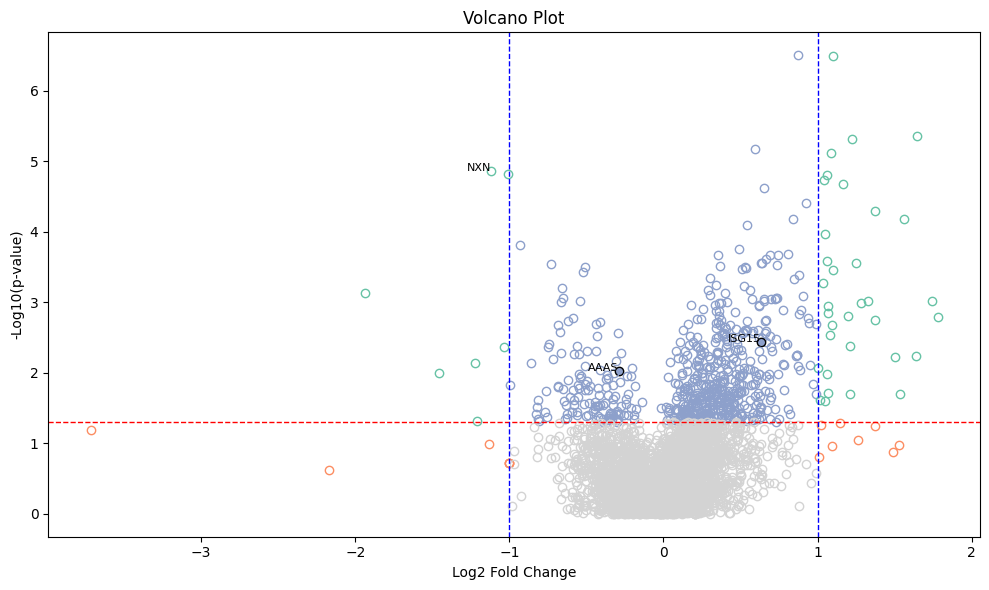

In [60]:
volcano_plot(df, gene_label_dict=custom_gene_labels, gene_highlight_dict=custom_gene_highlights)


## But now we will make the files: ORA

In [61]:
df = t_tests

In [62]:
# --- Select Top 100 Lowest and Highest 'fold_change' Values ---
ORA_Top100_down = df.nsmallest(100, 'fold_change')
ORA_Top100_up = df.nlargest(100, 'fold_change')


In [63]:
#ORA_Top100_down

Quickly check how it looksss.

In [64]:
# --- Create Dictionary from Both Top and Bottom Fold Changes ---
change = {
    gene: gene for gene in ORA_Top100_down['Gene name']
}
change.update({
    gene: gene for gene in ORA_Top100_up['Gene name']
})


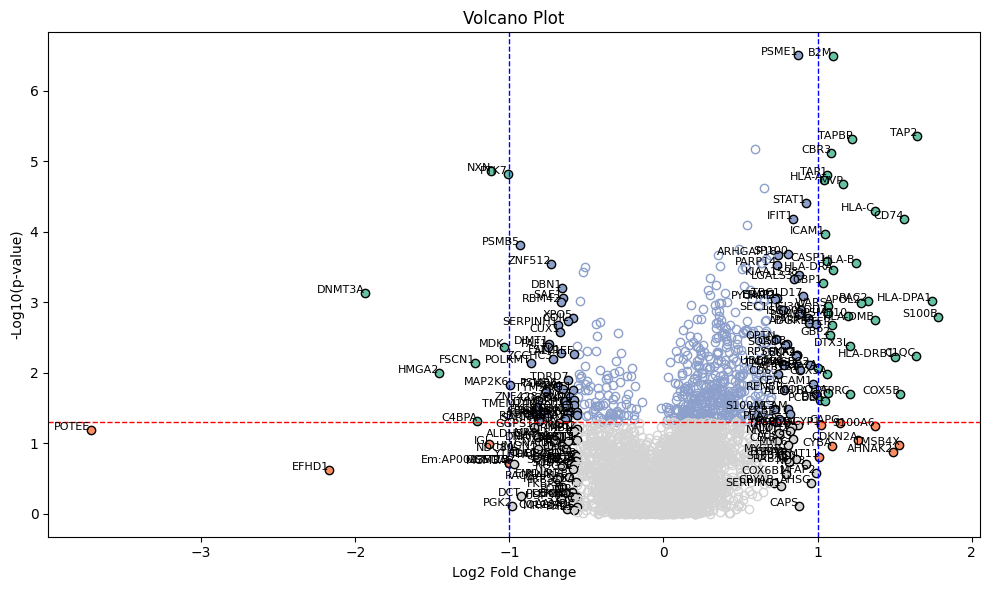

In [65]:
volcano_plot(df, change)

⭐Making significant files.

In [66]:
# --- Select Top 100 and Top 300 Lowest 'p_value' Entries ---
ORA_TopSig100 = df.nsmallest(100, 'p_value')
ORA_TopSig300 = df.nsmallest(300, 'p_value')


In [67]:
# --- Create Dictionary from Both Top and Bottom Fold Changes ---
change = {
    gene: gene for gene in ORA_TopSig100['Gene name']
}


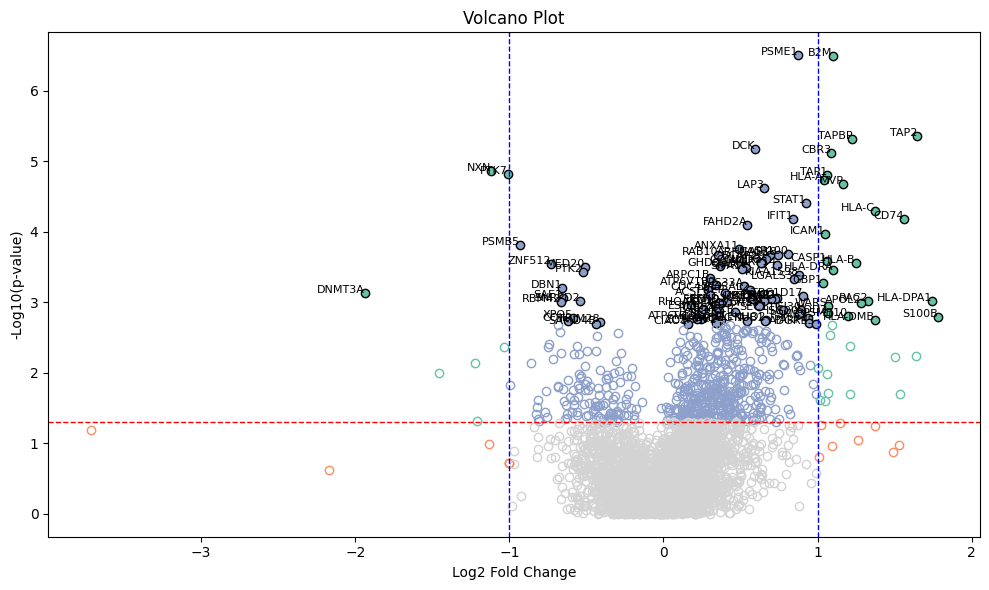

In [68]:
volcano_plot(df, change)

In [69]:
# --- Create Dictionary from Both Top and Bottom Fold Changes ---
change = {
    gene: gene for gene in ORA_TopSig300['Gene name']
}


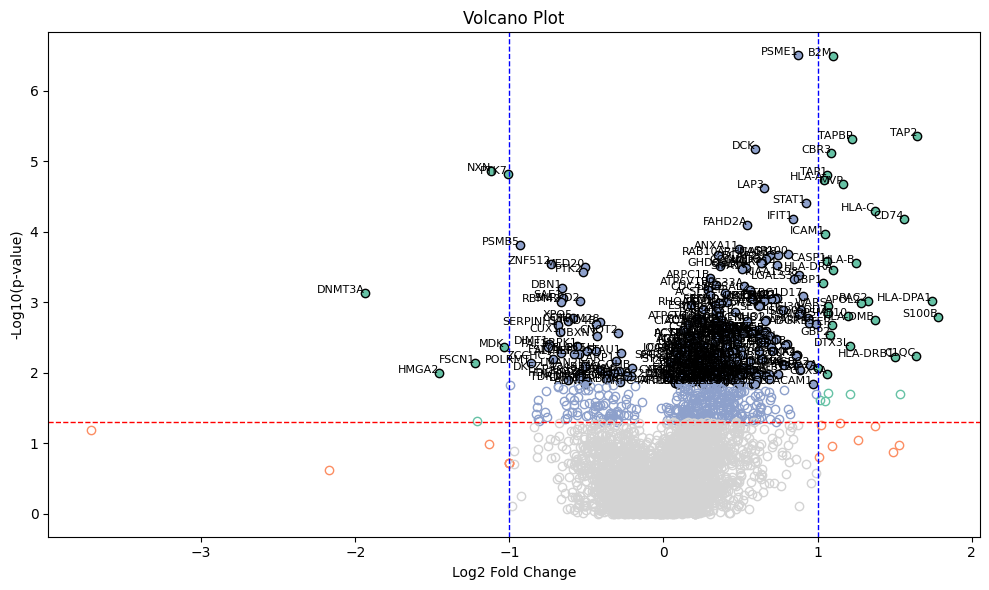

In [70]:
volcano_plot(df, None, change)

## From the previous section we can reflect on how to maybe, actually select the top proteins, significant or p-value.

## Now we save these files for the string-db

In [71]:
def generate_ora_file(df, filename, gene_column='Gene name', pddata=PDdata):
    """
    Given a DataFrame with a gene name column, map to Uniprot IDs using PDdata
    and export a .txt file for ORA tools.

    Parameters:
    - df: DataFrame containing gene names
    - filename: Output .txt file name (string)
    - gene_column: Column in df containing gene names (default 'Gene_name')
    - pddata: DataFrame with gene-to-uniprot mapping (default global PDdata)
    """
    # Build mapping from Gene_name to Uniprot
    mapping = pddata[['Gene name', 'Uniprot']].dropna().drop_duplicates().set_index('Gene name')['Uniprot']

    # Map Uniprot IDs into the DataFrame
    df['Uniprot'] = df[gene_column].map(mapping)

    # Export only valid Uniprot IDs
    df['Uniprot'].dropna().to_csv(filename, index=False, header=False)


In [72]:
generate_ora_file(ORA_Top100_up, 'ORA_Top100_up.txt')
generate_ora_file(ORA_Top100_down, 'ORA_Top100_down.txt')
generate_ora_file(ORA_TopSig100, 'ORA_TopSig100.txt')
generate_ora_file(ORA_TopSig300, 'ORA_TopSig300.txt')


## We will also make the GSEA file, which has uniprot value and log2 ratio (which is known as fold change in our code).

In [73]:
# Step 1: Get unique Gene_name → Uniprot mapping from PDdata
gene_uniprot = PDdata[['Gene name', 'Uniprot']].dropna().drop_duplicates()

# Step 2: Get fold_change from t_tests and rename
fold_changes = t_tests[['Gene name', 'fold_change']].rename(columns={'fold_change': 'log2Ratio'})

# Step 3: Merge them on Gene_name
GSEA = gene_uniprot.merge(fold_changes, on='Gene name')

# Step 4: Keep only Uniprot and log2Ratio
GSEA = GSEA[['Uniprot', 'log2Ratio']]


In [74]:
GSEA.to_csv("GSEA.txt", sep="\t", index=False, header=False)


##Future Inquiries

In [75]:
# what is background. what is the difference between ORA with only protein and also with log2change.

# Our cluster

In [76]:
#upload genes from our cluster.txt
# --- Load Genes from Text File and Define Highlights ---
genes = set()

with open("genes from our cluster.txt", "r") as file:
    for line in file:
        gene = line.strip()
        if gene:
            genes.add(gene)

custom_gene_highlights = {gene: "label" for gene in genes}

custom_gene_labels = {'NXN':'NXN'}


In [77]:
df = t_tests

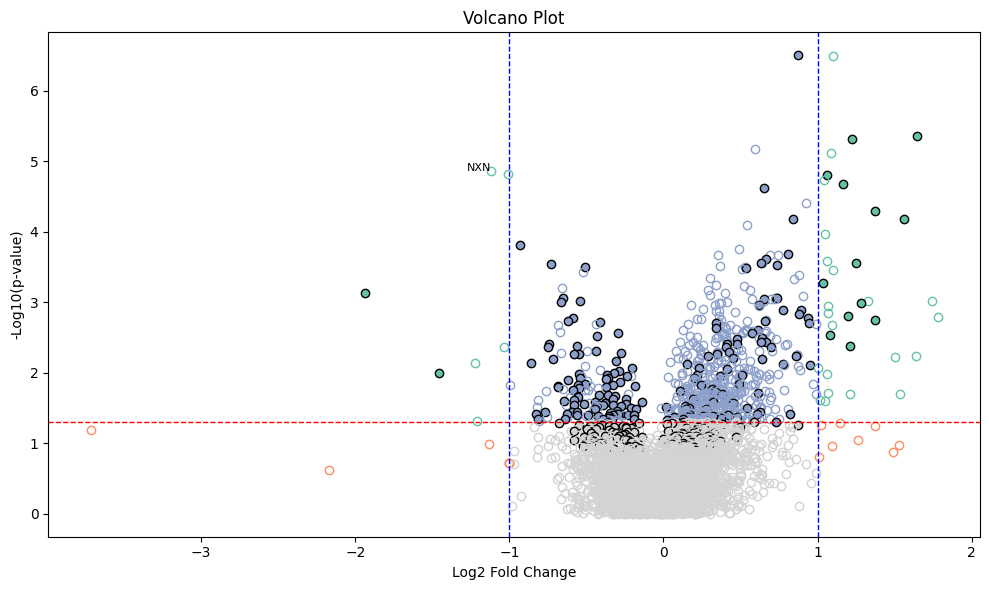

In [78]:
volcano_plot(df, custom_gene_labels, custom_gene_highlights)